In [79]:
import numpy as np
import matplotlib.pyplot as plt

$f'(t)=t\cdot f(t)$
$f(0)=1$

--- 
$f(t)=e^{t^2/2}$


In [80]:
def f(t,yk):
    return t*yk

def yPrime(t):
    return np.exp(t**2/2)

In [81]:
def euler(f, t0, y0, dt, n):
    t = t0
    y = y0

    ts = [t0]
    ys=[y0]

    for i in range(n):
        y = y + dt*f(t,y)
        t = t + dt
        ts.append(t)
        ys.append(y)
    return ts, ys

In [82]:
def heun(f, t0, y0, dt, n):
    t = t0
    y = y0

    ts = [t0]
    ys=[y0]

    for i in range(n):
        y = y + dt/2*(f(t,y) + f(t+dt, y+dt*f(t,y)))
        t = t + dt

        ts.append(t)
        ys.append(y)
    return ts, ys

In [83]:
def rungeKutta(f, t0, y0, dt, n):
    t = t0
    y = y0

    ts = [t0]
    ys=[y0]

    for i in range(n):
        T1 = f(t,y)
        T2 = f(t+dt/2, y+dt/2*T1)
        T3 = f(t+dt/2, y+dt/2*T2)
        T4 = f(t+dt, y+dt*T3)

        y = y + dt/6*(T1 + 2*T2 + 2*T3 + T4)
        t = t + dt

        ts.append(t)
        ys.append(y)

    return ts, ys

In [84]:
x = np.linspace(0, 4, 200)

f_true = yPrime(x)
f_euler = euler(f, 0, 1, 1, 4)
f_heun = heun(f, 0, 1, 1, 4)
f_rungeKutta = rungeKutta(f, 0, 1, 1, 4)

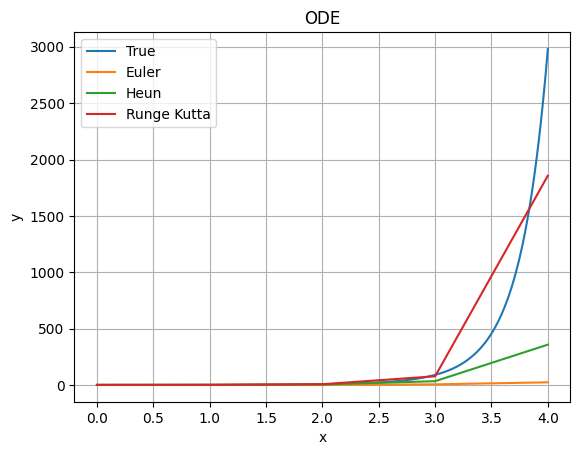

In [85]:

plt.plot(x,f_true, label='True')
plt.plot(f_euler[0], f_euler[1], label='Euler')
plt.plot(f_heun[0], f_heun[1], label='Heun')
plt.plot(f_rungeKutta[0], f_rungeKutta[1], label='Runge Kutta')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True', 'Euler', 'Heun', 'Runge Kutta'])
plt.grid()

plt.title('ODE')
plt.show()

In [86]:
f_euler

([0, 1, 2, 3, 4], [1, 1, 2, 6, 24])

In [87]:
f_heun

([0, 1, 2, 3, 4], [1, 1.5, 5.25, 34.125, 358.3125])

In [88]:
f_rungeKutta

([0, 1, 2, 3, 4],
 [1,
  1.6458333333333333,
  7.200520833333333,
  77.7056206597222,
  1856.8405603479448])